# Visualising the groups from XMM observations

We now use the XMM observations that we have processed to create basic visualisations of the galaxy groups.

## <font color=#FF0000>Notes to self</font>
* <font color=#FF0000>Slightly suspicious of my converted XCS regions</font>

## Import statements

In [1]:
import pandas as pd
import numpy as np
from astropy.units import Quantity
from astropy.cosmology import LambdaCDM
import os
from shutil import rmtree

import xga
# This just sets the number of cores this analysis is allowed to use
xga.NUM_CORES = 40
# This is a bodge that will only work because xga_output in notebooks has already been defined, XGA
#  will be made to handle this more gracefully at some point
temp_dir = xga.OUTPUT
actual_dir = temp_dir.split('notebooks/')[0]+'xga_output/'
xga.OUTPUT = actual_dir
xga.utils.OUTPUT = actual_dir
# As currently XGA will setup an xga_output directory in our current directory, I remove it to keep it all clean
if os.path.exists('xga_output'):
    rmtree('xga_output')
from xga.samples import BaseSample
from xga.sas import emosaic

%matplotlib inline

## Reading the sample file

This sample file is required again so that we know the central coordinates and redshifts of the groups.

In [2]:
samp = pd.read_csv('../sample_files/init_group_info.csv')
samp

,name,est_ra,est_dec,redshift
0,25124,243.629055,26.730240,0.186
1,44739,229.793620,28.331750,0.118
2,19670A,150.256710,50.793942,0.134
3,19670B,150.214920,50.805014,0.134
4,12833,129.496800,44.248700,0.145
5,44858,230.112000,28.887750,0.127
6,PHL1811,328.769920,-9.588805,0.077


## Declaring an XGA sample

A BaseSample object is declared, rather than an ExtendedSample or a ClusterSample, because initially we do not want any automated region matching to take place. From past work we know that some of these groups are very low surface brightness, and in some the major visible contribution to X-ray emission is from member galaxies.

This sample will not match to region files, but we can still use it to create images on which regions can be overlaid:

In [3]:
srcs = BaseSample(samp['est_ra'].values, samp['est_dec'].values, samp['redshift'].values, samp['name'].values)

Declaring BaseSource Sample: 100%|██████████| 7/7 [00:01<00:00,  5.45it/s]
/mnt/ufs18/home-218/turne540/code/XGA/xga/samples/base.py:112: UserWarning: The following do not appear to have any XMM data, and will not be included in the sample (can also check .failed_names); 25124, 44739
  warn("The following do not appear to have any XMM data, and will not be included in the "


## Looking at the information available for each group

We can cycle through the sources declared as a part of our sample, and summarise the available XMM observations and information that we currently have available. There is precious little of it! 

**Note that two of the objects are not a part of the sample - I currently don't have access to two XMM observations that are still proprietary**

In [4]:
for src in srcs:
    src.info()


-----------------------------------------------------
Source Name - 19670A
User Coordinates - (150.25671, 50.793942) degrees
nH - 0.0112 1e+22 / cm2
Redshift - 0.134
XMM ObsIDs - 1
PN Observations - 1
MOS1 Observations - 1
MOS2 Observations - 1
On-Axis - 0
With regions - 1
Total regions - 69
Obs with 1 detection - 1
Obs with >1 matches - 0
Images associated - 6
Exposure maps associated - 6
Combined Ratemaps associated - 1
Spectra associated - 0
-----------------------------------------------------


-----------------------------------------------------
Source Name - 19670B
User Coordinates - (150.21492, 50.805014) degrees
nH - 0.0112 1e+22 / cm2
Redshift - 0.134
XMM ObsIDs - 1
PN Observations - 1
MOS1 Observations - 1
MOS2 Observations - 1
On-Axis - 1
With regions - 1
Total regions - 69
Obs with 1 detection - 1
Obs with >1 matches - 0
Images associated - 6
Exposure maps associated - 6
Combined Ratemaps associated - 1
Spectra associated - 0
---------------------------------------------

## Generate combined ratemaps

If a 'proper' ClusterSample had been declared, this process would have been run automatically, but in this case we manually generate combined 0.5-2.0 keV ratemaps by calling emosaic (with the default `lo_en=Quantity(0.5, 'keV')` and `hi_en=Quantity(2.0, 'keV')` values) separately for images and exposure maps. The count-rate maps are created automatically when a matching pair of image and exposure map are detected: 

In [5]:
emosaic(srcs, 'image')
emosaic(srcs, 'expmap')

## View XMM visualisations of the groups

Two ratemap visualisations are created for each group, one with the full combined field of view of the available XMM observations, and one zoomed in to an aperture with radius 500 kpc. The XCS detection regions are overlaid on both:

19670A


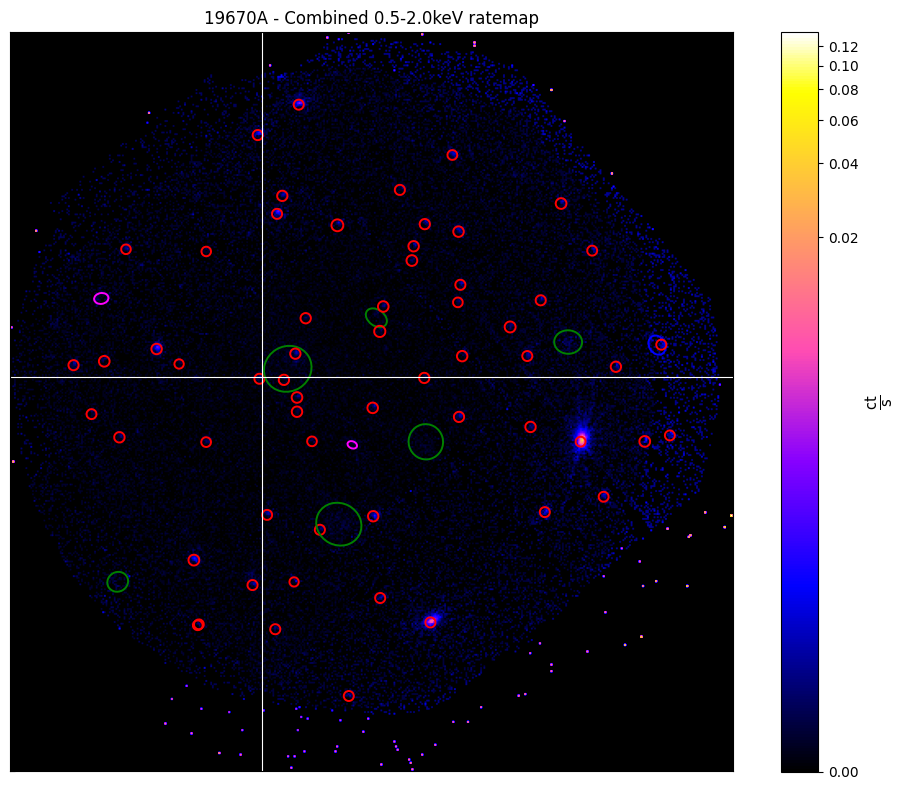

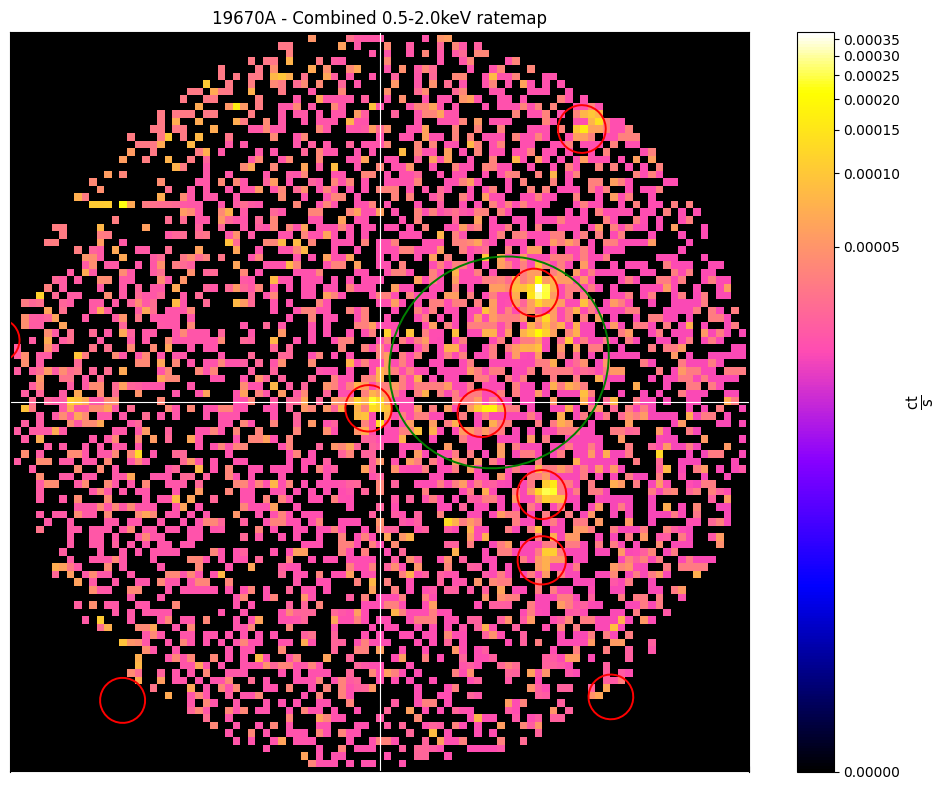





19670B


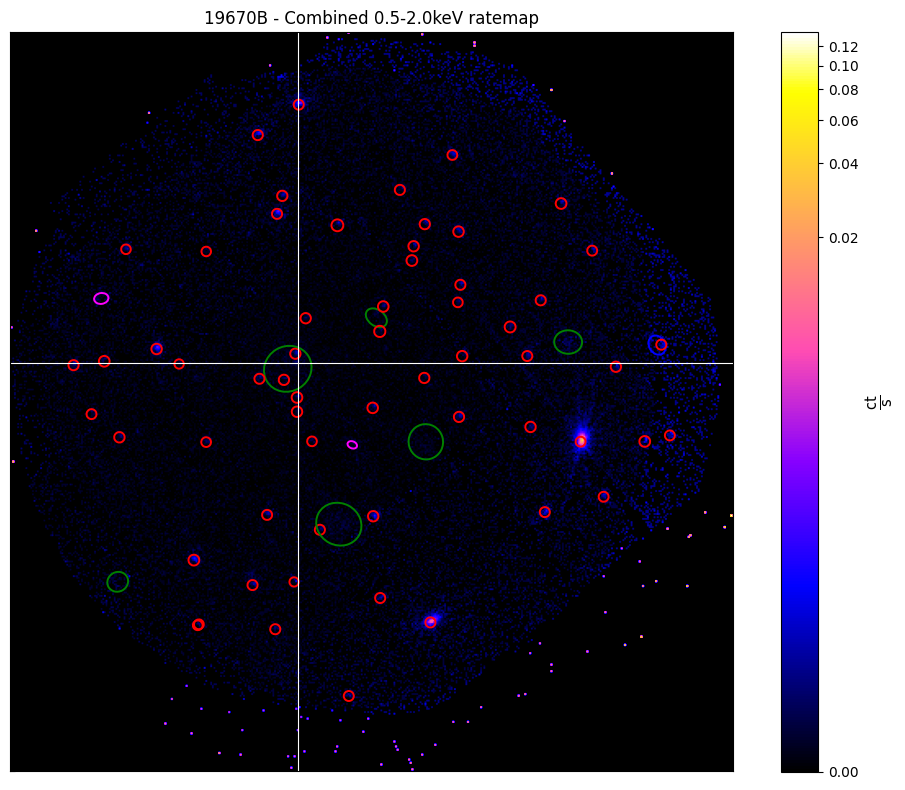

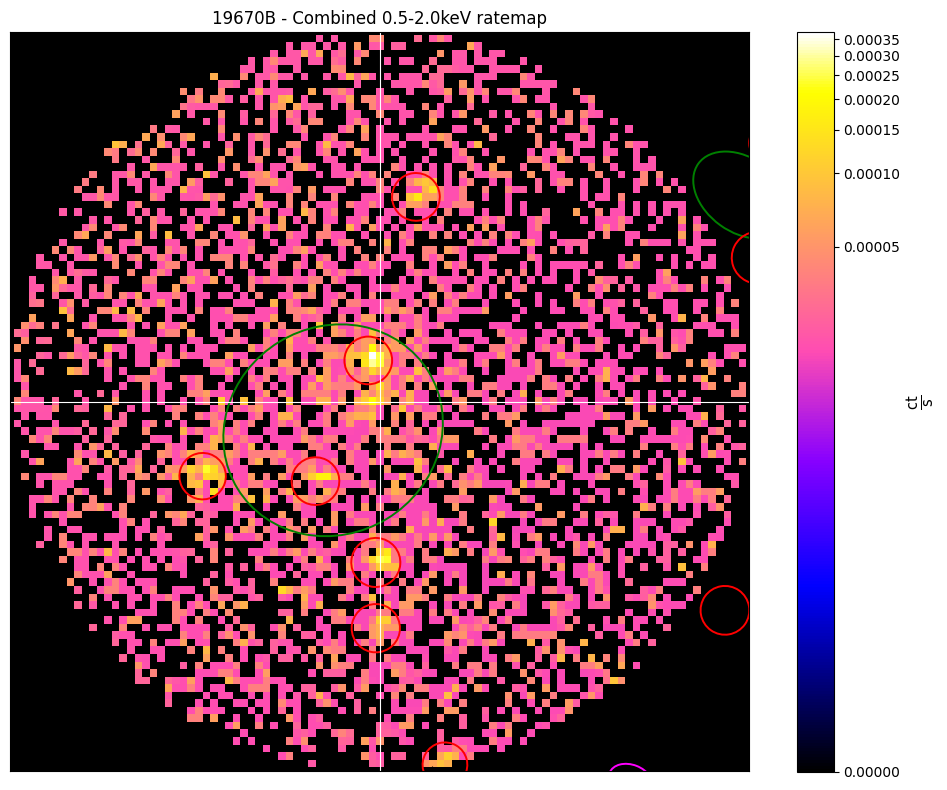





12833


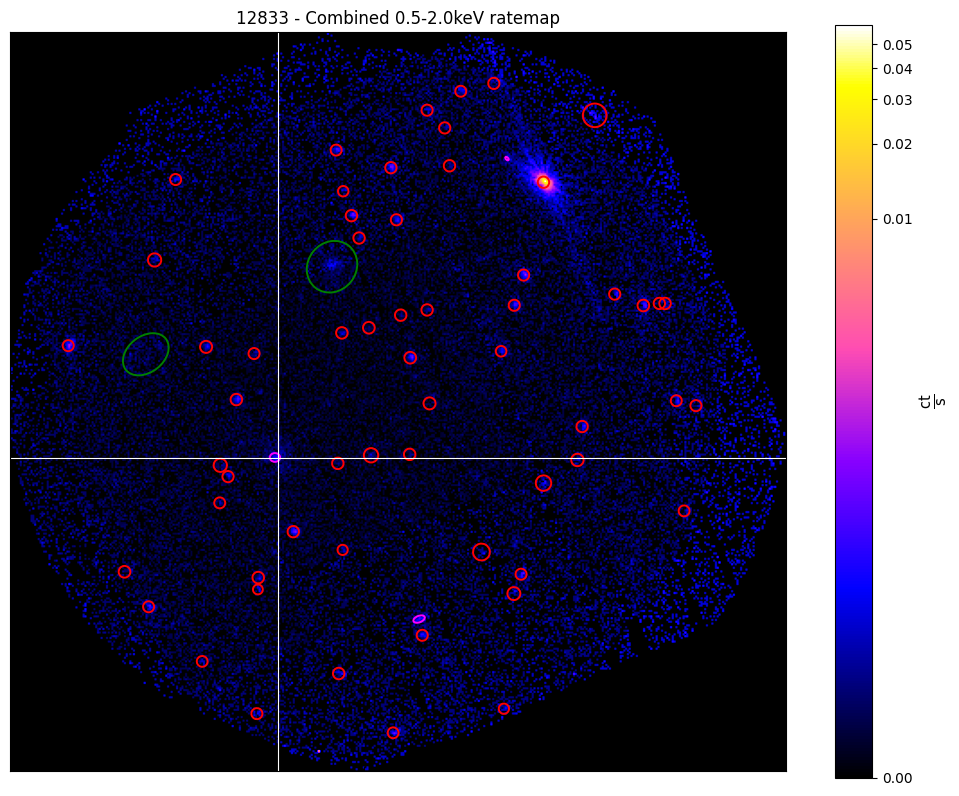

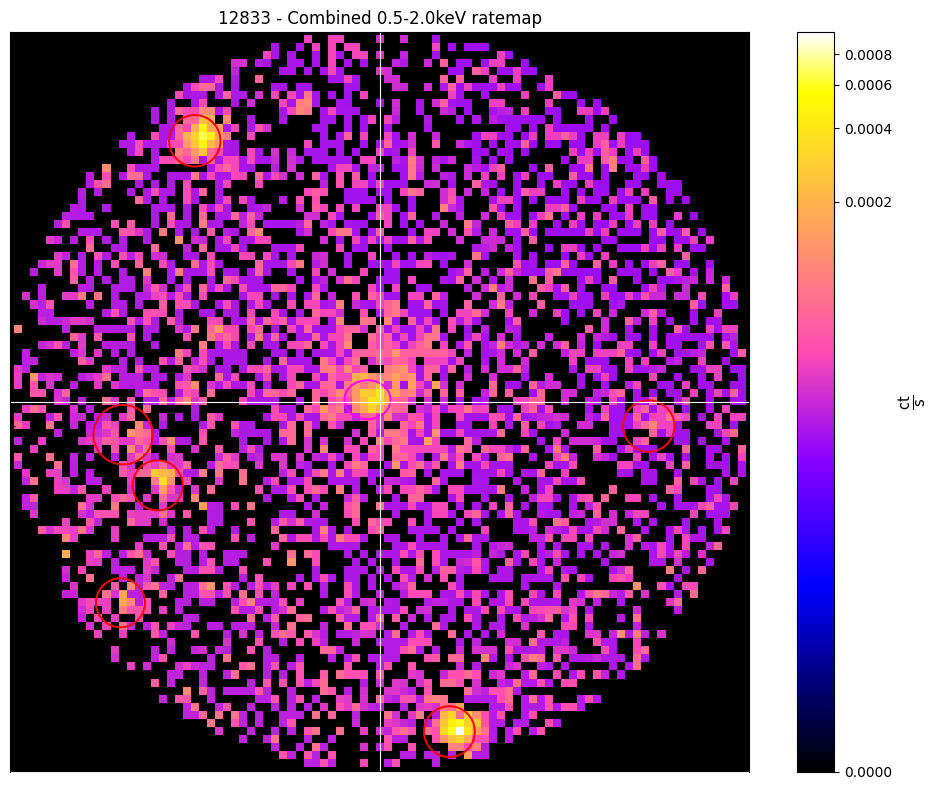





44858


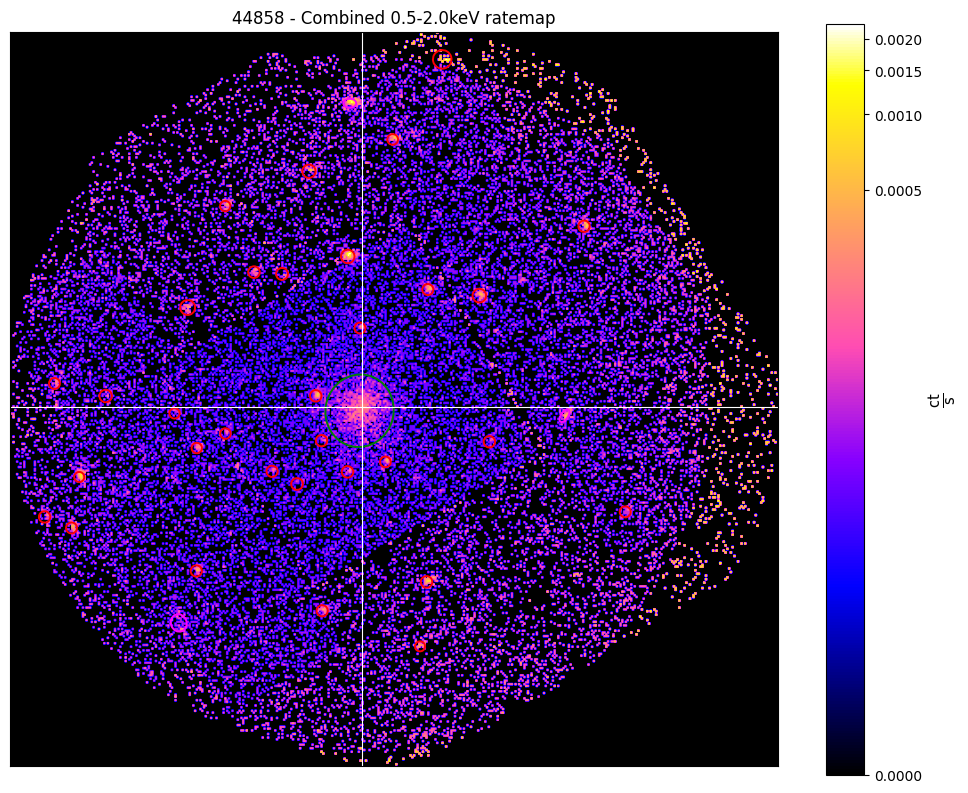

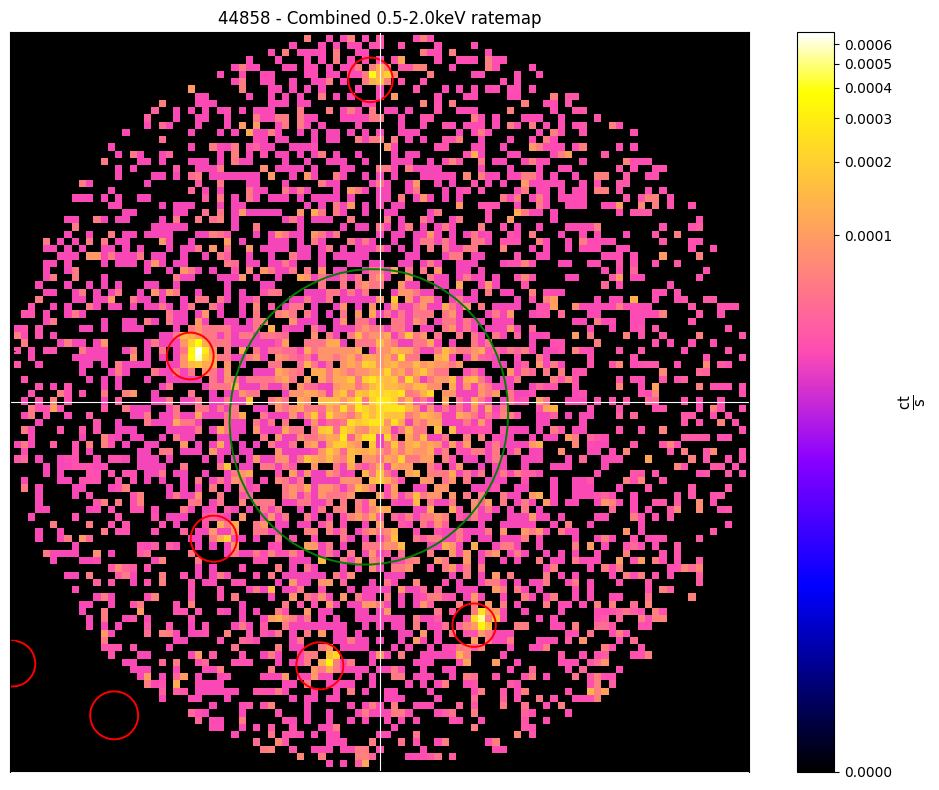





PHL1811


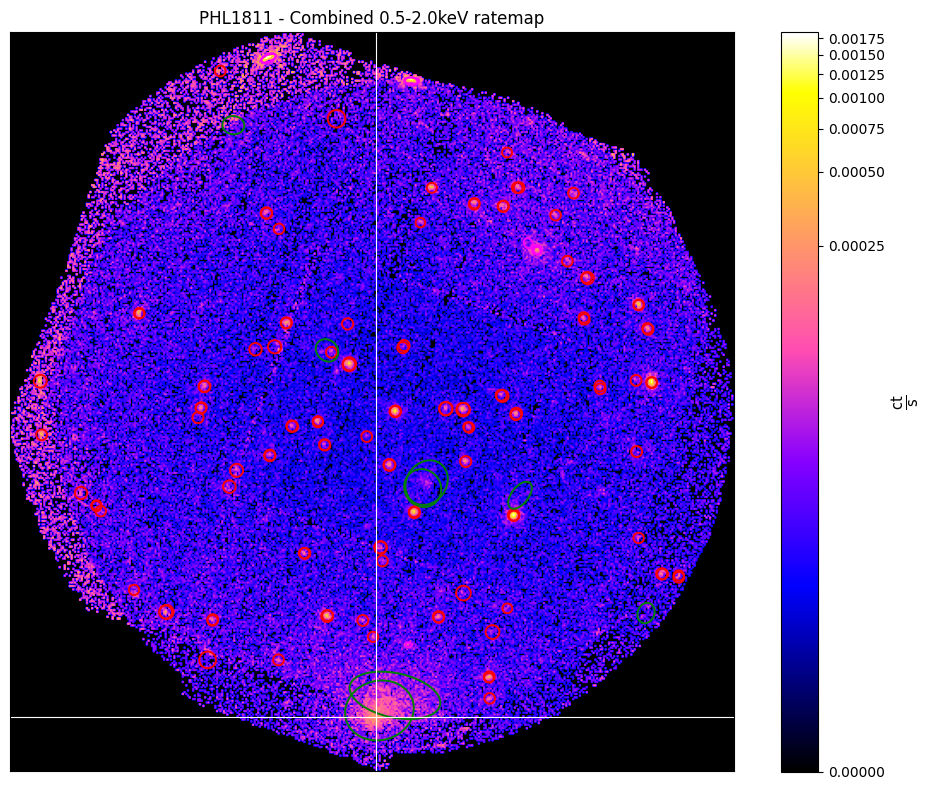

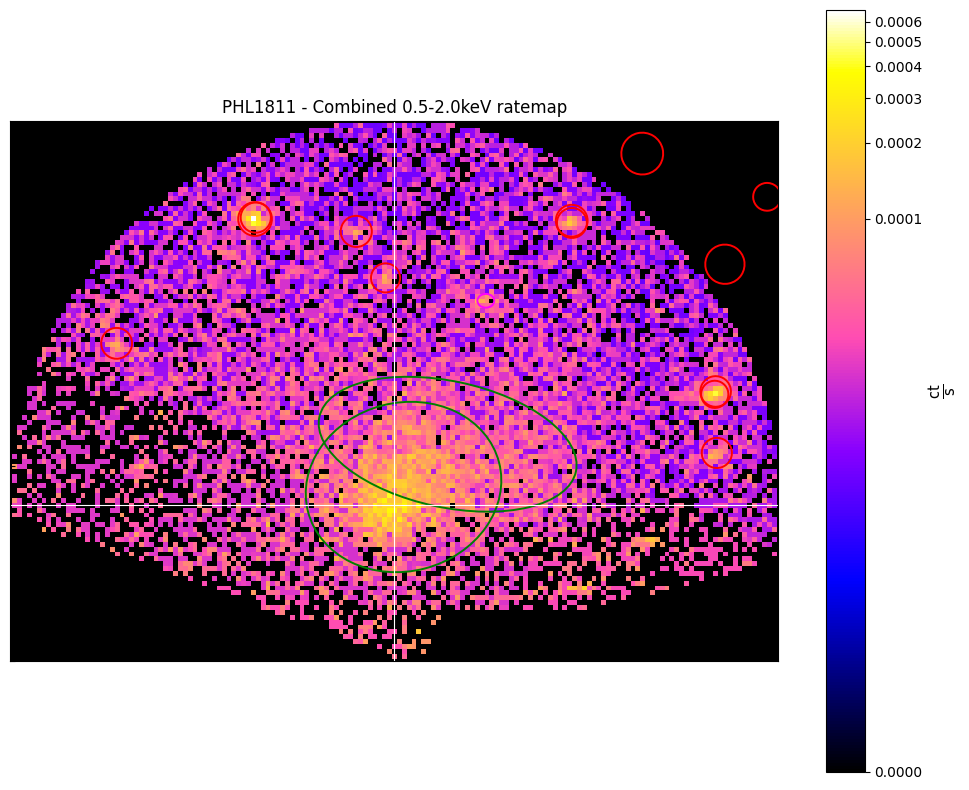

In [13]:
for src in srcs:
    print(src.name)
    rt = src.get_combined_ratemaps()
    rt.regions = src._initial_regions
    rt.view(src.ra_dec, zoom_in=True, view_regions=True)
    rt.view(src.ra_dec, src.get_custom_mask(Quantity(500, 'kpc'), remove_interlopers=False), view_regions=True, 
            zoom_in=True)
    print('\n\n\n')